In [1]:
from fbprophet import Prophet
import pandas as pd

In [2]:
data = pd.read_csv("TimeSeriesData.csv", index_col = 'Date')
data.dropna(inplace = True)

In [3]:
data = data.reset_index()

In [4]:
data.head()

,Date,Number of patients
0,4/1/2015,49
1,4/2/2015,58
2,4/3/2015,36
3,4/4/2015,44
4,4/5/2015,64


In [5]:
data.columns = ['ds', 'y']

In [6]:
data['ds'] = pd.to_datetime(data['ds'])

In [7]:
data.head()

,ds,y
0,2015-04-01,49
1,2015-04-02,58
2,2015-04-03,36
3,2015-04-04,44
4,2015-04-05,64


# Additive 

In [8]:
train_data = data.iloc[:1094]
test_data = data.iloc[1094:]

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


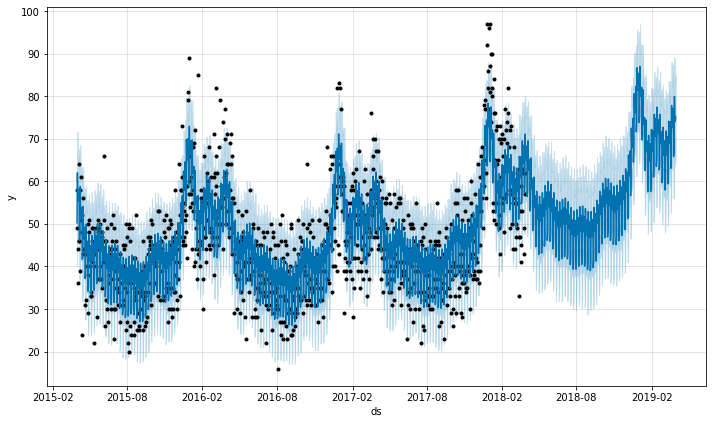

In [9]:
m = Prophet()
m.fit(train_data)
future = m.make_future_dataframe(periods = 367, freq = 'D')
forecast = m.predict(future)
fig = m.plot(forecast)

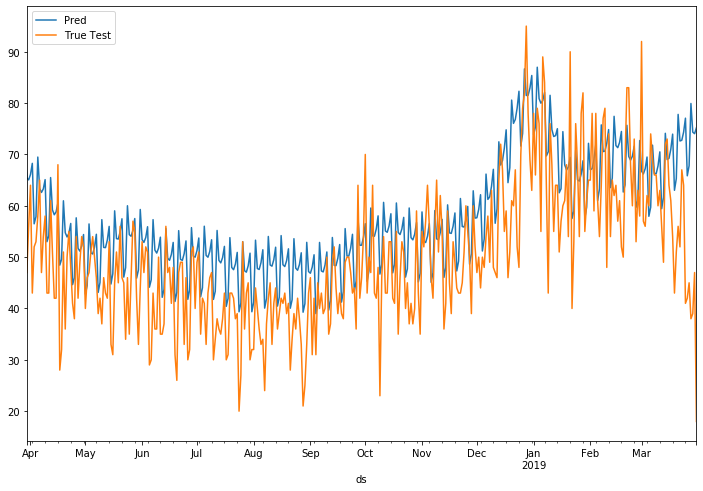

In [10]:
ax = forecast.plot(x = 'ds', y = 'yhat', label = 'Pred',
                  legend = True, figsize = (12,8))
test_data.plot(x = 'ds', y = 'y', label = 'True Test', legend = True, ax = ax, 
              xlim = ('2018-03-30', '2019-03-31'))

In [11]:
from statsmodels.tools.eval_measures import rmse
predictions = forecast.iloc[-367:]['yhat']

In [12]:
rmse(predictions, test_data['y'])

11.864648280669616

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_absolute_error(test_data['y'], predictions)

9.410566305430878

In [13]:
test_data['y'].std()

13.352273217376506

In [15]:
test_data.describe()

,y
count,367.000000
mean,49.722071
std,13.352273
min,18.000000
25%,41.000000
50%,48.000000
75%,57.000000
max,95.000000


# Multiplicative 

In [16]:
train_data = data.iloc[:1094]
test_data = data.iloc[1094:]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


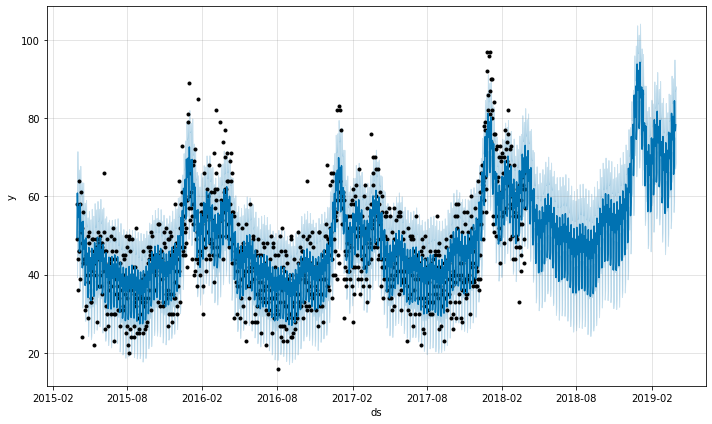

In [17]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(train_data)
future = m.make_future_dataframe(periods = 367, freq = 'D')
forecast = m.predict(future)
fig = m.plot(forecast)

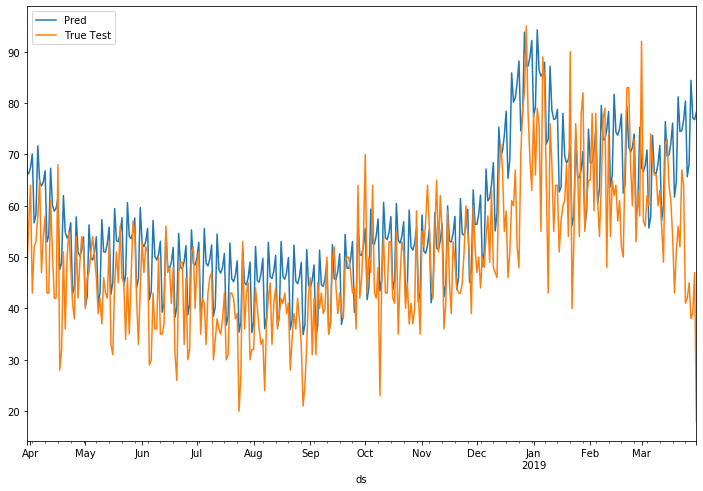

In [18]:
ax = forecast.plot(x = 'ds', y = 'yhat', label = 'Pred',
                  legend = True, figsize = (12,8))
test_data.plot(x = 'ds', y = 'y', label = 'True Test', legend = True, ax = ax, 
              xlim = ('2018-03-30', '2019-03-31'))

In [19]:
from statsmodels.tools.eval_measures import rmse
predictions = forecast.iloc[-367:]['yhat']

In [20]:
rmse(predictions, test_data['y'])

12.01853667465819

In [21]:
test_data.describe()

,y
count,367.000000
mean,49.722071
std,13.352273
min,18.000000
25%,41.000000
50%,48.000000
75%,57.000000
max,95.000000


In [22]:
test_data['y'].std()

13.352273217376506

# Final - Additive

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


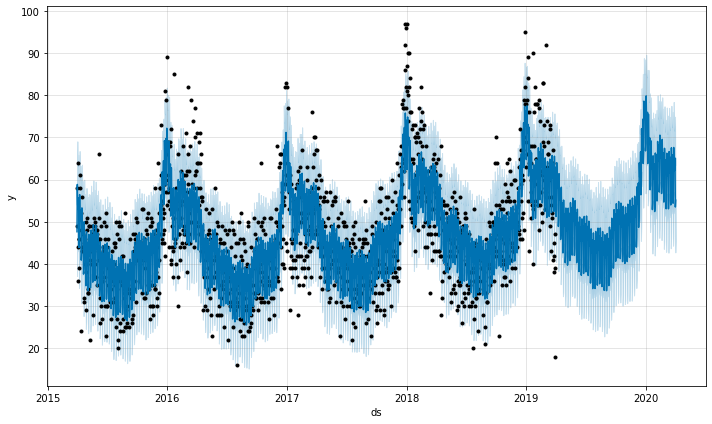

In [23]:
m = Prophet()
m.fit(data)
future = m.make_future_dataframe(periods = 367, freq = 'D')
forecast = m.predict(future)
fig = m.plot(forecast)

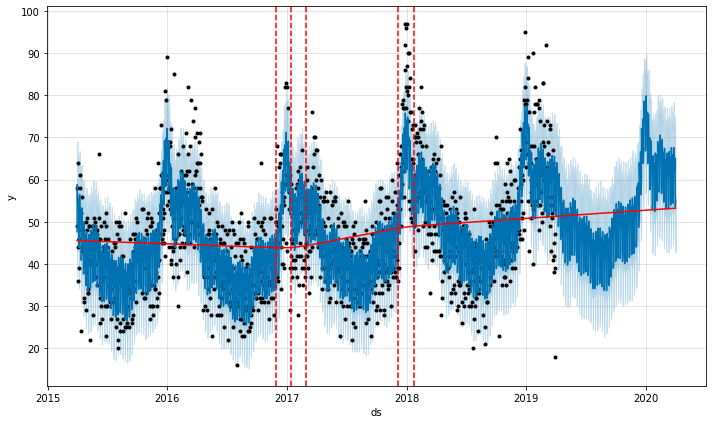

In [24]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

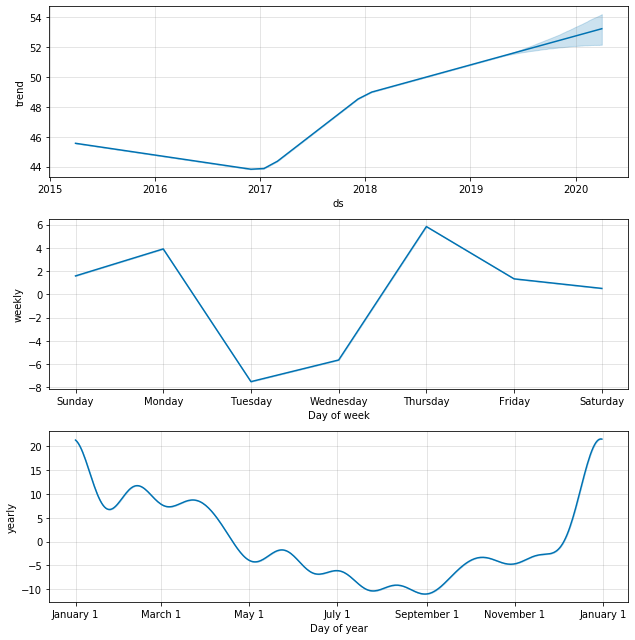

In [25]:
fig = m.plot_components(forecast)

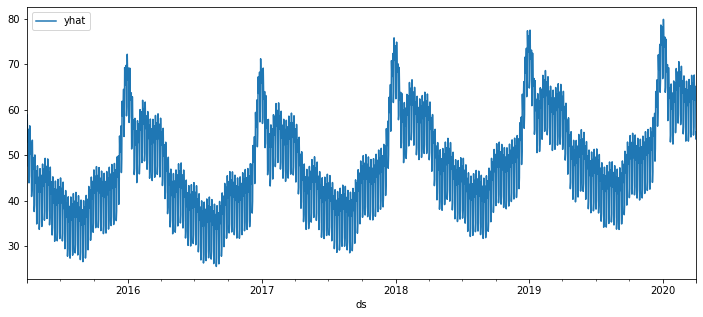

In [26]:
forecast.plot(legend = True, x = 'ds', y = 'yhat', figsize = (12,5))

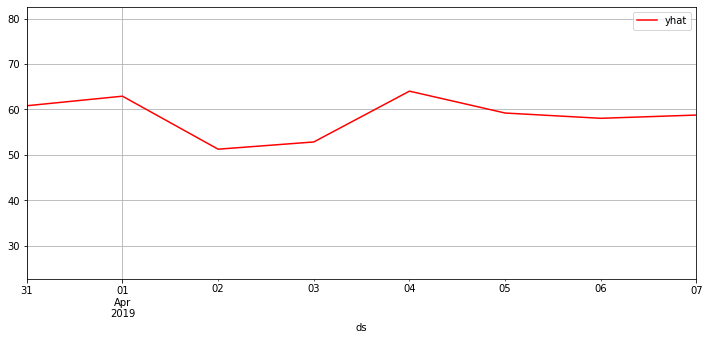

In [27]:
ax = forecast.plot(legend = True, x = 'ds', y = 'yhat', figsize = (12,5), xlim = ['2019-03-31', '2019-04-07'], ls = '-', c = 'r')
ax.yaxis.grid(True)
ax.xaxis.grid(True)